### Data Health About COVID19

In [1]:
import praw
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib as plt
from textblob import TextBlob
import seaborn as sns
import numpy as np

#### Cargar variables de entorno

In [20]:
load_dotenv()

reddit = praw.Reddit(
    client_id= os.getenv('CLIENT_ID'),
    client_secret= os.getenv('CLIENT_SECRET'),
    user_agent= os.getenv('USER_AGENT')
)

#### Extraemos la data de la API de Reddit

In [21]:
subreddits = ['vaccine', 'COVID19', 'Coronavirus', 'science']
all_posts = []

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    for post in subreddit.new(limit=1000):
        all_posts.append({
            "subreddit": subreddit_name,
            "title": post.title,
            "text": post.selftext,
            "comments": post.num_comments,
            "ups": post.ups,
            "created_utc": post.created_utc
            
        })

df = pd.DataFrame(all_posts)

df.head(1000)

,subreddit,title,text,comments,ups,created_utc
0,vaccine,Recent TDAP shot after a fall,I fell and scraped my knee pretty good in my p...,3,3,1.706333e+09
1,vaccine,WHO issues measles warning as yearly cases in ...,,1,4,1.706087e+09
2,vaccine,Curious and wondering,I was given series of 3 shots of tetanus vacci...,2,3,1.706073e+09
3,vaccine,Very Late second dose for Hepatitis B vaccine,"So I had my first dose last July 15, 2023 and ...",3,4,1.705140e+09
4,vaccine,How necessary would you say a Hep B vaccine is...,They offer only a 2 doses and not one so I won...,4,2,1.704919e+09
...,...,...,...,...,...,...
995,COVID19,Virological characteristics correlating with S...,,2,29,1.696387e+09
996,COVID19,Vaccine Effectiveness Against Long COVID in Ch...,,5,47,1.696235e+09
997,COVID19,T Cell Cross-reactivity in Autoimmune-like Hep...,,4,40,1.696198e+09
998,COVID19,TMPRSS2 activation of Omicron lineage Spike gl...,,1,14,1.696189e+09


#### Convertir 'created_utc' a datetime

In [22]:
df['date'] = pd.to_datetime(df['created_utc'], unit='s')
df.head(10)

,subreddit,title,text,comments,ups,created_utc,date
0,vaccine,Recent TDAP shot after a fall,I fell and scraped my knee pretty good in my p...,3,3,1.706333e+09,2024-01-27 05:23:19
1,vaccine,WHO issues measles warning as yearly cases in ...,,1,4,1.706087e+09,2024-01-24 09:08:26
2,vaccine,Curious and wondering,I was given series of 3 shots of tetanus vacci...,2,3,1.706073e+09,2024-01-24 05:17:27
3,vaccine,Very Late second dose for Hepatitis B vaccine,"So I had my first dose last July 15, 2023 and ...",3,4,1.705140e+09,2024-01-13 10:01:50
4,vaccine,How necessary would you say a Hep B vaccine is...,They offer only a 2 doses and not one so I won...,4,2,1.704919e+09,2024-01-10 20:42:57
5,vaccine,Quad flu vaccine walgreen,"I got the quad flu vax from Walgreens, I was a...",4,3,1.704835e+09,2024-01-09 21:20:31
6,vaccine,Herd Immunity with Polio Vaccine RE: Fecal/Ora...,"For many vaccines, the approach to build immun...",3,2,1.704745e+09,2024-01-08 20:21:12
7,vaccine,Dr. Jonathan Howard: Polio vs. COVID,,3,3,1.704644e+09,2024-01-07 16:09:15
8,vaccine,How long do vaccines last actually?,I was looking through my shot record and found...,6,5,1.704638e+09,2024-01-07 14:25:42
9,vaccine,Need advice for vaccines,Need vaccination advice for rabies\n\nSo I com...,1,2,1.704571e+09,2024-01-06 19:51:36


#### Encontrar el sentimiento de un texto con textblob

In [36]:
def get_sentiment(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity  # Rango -1 (negativo) a 1 (positivo)

df['title_sentiment'] = df['title'].apply(get_sentiment)
df['text_sentiment'] = df['text'].apply(get_sentiment)

df.head(30)

,subreddit,title,text,comments,ups,date,average_sentiment,sentiment_label,subreddit_sentiment,title_sentiment,text_sentiment
0,vaccine,Recent TDAP shot after a fall,I fell and scraped my knee pretty good in my p...,3,3,2024-01-27 05:23:19,0.109722,positivo,vaccine - positivo,0.000000,0.219444
1,vaccine,WHO issues measles warning as yearly cases in ...,,1,4,2024-01-24 09:08:26,0.250000,positivo,vaccine - positivo,0.500000,0.000000
2,vaccine,Curious and wondering,I was given series of 3 shots of tetanus vacci...,2,3,2024-01-24 05:17:27,-0.042857,neutral,vaccine - neutral,-0.100000,0.014286
3,vaccine,Very Late second dose for Hepatitis B vaccine,"So I had my first dose last July 15, 2023 and ...",3,4,2024-01-13 10:01:50,-0.049583,neutral,vaccine - neutral,-0.195000,0.095833
4,vaccine,How necessary would you say a Hep B vaccine is...,They offer only a 2 doses and not one so I won...,4,2,2024-01-10 20:42:57,-0.053472,neutral,vaccine - neutral,0.000000,-0.106944
5,vaccine,Quad flu vaccine walgreen,"I got the quad flu vax from Walgreens, I was a...",4,3,2024-01-09 21:20:31,-0.004181,neutral,vaccine - neutral,0.000000,-0.008362
6,vaccine,Herd Immunity with Polio Vaccine RE: Fecal/Ora...,"For many vaccines, the approach to build immun...",3,2,2024-01-08 20:21:12,0.093750,neutral,vaccine - neutral,0.000000,0.187500
7,vaccine,Dr. Jonathan Howard: Polio vs. COVID,,3,3,2024-01-07 16:09:15,0.000000,neutral,vaccine - neutral,0.000000,0.000000
8,vaccine,How long do vaccines last actually?,I was looking through my shot record and found...,6,5,2024-01-07 14:25:42,-0.056944,neutral,vaccine - neutral,-0.016667,-0.097222
9,vaccine,Need advice for vaccines,Need vaccination advice for rabies\n\nSo I com...,1,2,2024-01-06 19:51:36,0.035000,neutral,vaccine - neutral,0.000000,0.070000


#### Promediar las columnas title_sentiment y text_sentiment y asignar etiquetas

In [40]:
def sentiment_label(avg_sentiment):
    if avg_sentiment > 0.1:
        return 'positivo'
    elif avg_sentiment < -0.1:
        return 'negativo'
    else:
        return 'neutral'

df['average_sentiment'] = (df['title_sentiment'] + df['text_sentiment']) / 2
df['sentiment_label'] = df['average_sentiment'].apply(sentiment_label)
df.head(20)

,subreddit,title,text,comments,ups,date,average_sentiment,sentiment_label,subreddit_sentiment,title_sentiment,text_sentiment
0,vaccine,Recent TDAP shot after a fall,I fell and scraped my knee pretty good in my p...,3,3,2024-01-27 05:23:19,0.109722,positivo,vaccine - positivo,0.000000,0.219444
1,vaccine,WHO issues measles warning as yearly cases in ...,,1,4,2024-01-24 09:08:26,0.250000,positivo,vaccine - positivo,0.500000,0.000000
2,vaccine,Curious and wondering,I was given series of 3 shots of tetanus vacci...,2,3,2024-01-24 05:17:27,-0.042857,neutral,vaccine - neutral,-0.100000,0.014286
3,vaccine,Very Late second dose for Hepatitis B vaccine,"So I had my first dose last July 15, 2023 and ...",3,4,2024-01-13 10:01:50,-0.049583,neutral,vaccine - neutral,-0.195000,0.095833
4,vaccine,How necessary would you say a Hep B vaccine is...,They offer only a 2 doses and not one so I won...,4,2,2024-01-10 20:42:57,-0.053472,neutral,vaccine - neutral,0.000000,-0.106944
5,vaccine,Quad flu vaccine walgreen,"I got the quad flu vax from Walgreens, I was a...",4,3,2024-01-09 21:20:31,-0.004181,neutral,vaccine - neutral,0.000000,-0.008362
6,vaccine,Herd Immunity with Polio Vaccine RE: Fecal/Ora...,"For many vaccines, the approach to build immun...",3,2,2024-01-08 20:21:12,0.093750,neutral,vaccine - neutral,0.000000,0.187500
7,vaccine,Dr. Jonathan Howard: Polio vs. COVID,,3,3,2024-01-07 16:09:15,0.000000,neutral,vaccine - neutral,0.000000,0.000000
8,vaccine,How long do vaccines last actually?,I was looking through my shot record and found...,6,5,2024-01-07 14:25:42,-0.056944,neutral,vaccine - neutral,-0.016667,-0.097222
9,vaccine,Need advice for vaccines,Need vaccination advice for rabies\n\nSo I com...,1,2,2024-01-06 19:51:36,0.035000,neutral,vaccine - neutral,0.000000,0.070000


#### Filtrar los posts para que solo aparezcan los que mencionan la palabra "COVID"

In [33]:
df_covid = df[df['title'].str.contains('covid', case=False) | df['text'].str.contains('covid', case=False)]
df_covid

,subreddit,title,text,comments,ups,date,average_sentiment,sentiment_label,subreddit_sentiment
5,vaccine,Quad flu vaccine walgreen,"I got the quad flu vax from Walgreens, I was a...",4,3,2024-01-09 21:20:31,-0.004181,neutral,vaccine - neutral
7,vaccine,Dr. Jonathan Howard: Polio vs. COVID,,3,3,2024-01-07 16:09:15,0.000000,neutral,vaccine - neutral
11,vaccine,Blood pressure at CVS/Walgreen for shingles vax?,So I am dx'ed and treated by my doc for high b...,3,4,2024-01-03 02:58:11,0.051429,neutral,vaccine - neutral
13,vaccine,Help!! I need documentation and studies for my...,My husband and I have been together for nearly...,31,5,2023-12-31 09:49:24,0.074594,neutral,vaccine - neutral
14,vaccine,"Allergic Reaction to Flu Shots, Not Moderna - ...","Hi, everyone!\n\nI have only had one flu shot ...",6,4,2023-12-30 17:10:29,0.066906,neutral,vaccine - neutral
...,...,...,...,...,...,...,...,...,...
3284,science,Smartphone contact tracing promised to break C...,,65,708,2024-01-02 18:54:21,0.071429,neutral,science - neutral
3358,science,Para-infectious brain injury in COVID-19 persi...,,10,112,2023-12-28 22:40:40,0.000000,neutral,science - neutral
3419,science,New findings establish the clinical significan...,,3,160,2023-12-25 11:44:20,0.018466,neutral,science - neutral
3427,science,Study examined the impact of voice assistant p...,,14,293,2023-12-24 14:19:28,0.107143,positivo,science - positivo


#### Limpiar columnas que no se necesitan

In [29]:
df = df.drop(['created_utc', 'text_sentiment', 'title_sentiment'], axis=1)
df.head()

,subreddit,title,text,comments,ups,date,average_sentiment,sentiment_label
0,vaccine,Recent TDAP shot after a fall,I fell and scraped my knee pretty good in my p...,3,3,2024-01-27 05:23:19,0.109722,positivo
1,vaccine,WHO issues measles warning as yearly cases in ...,,1,4,2024-01-24 09:08:26,0.250000,positivo
2,vaccine,Curious and wondering,I was given series of 3 shots of tetanus vacci...,2,3,2024-01-24 05:17:27,-0.042857,neutral
3,vaccine,Very Late second dose for Hepatitis B vaccine,"So I had my first dose last July 15, 2023 and ...",3,4,2024-01-13 10:01:50,-0.049583,neutral
4,vaccine,How necessary would you say a Hep B vaccine is...,They offer only a 2 doses and not one so I won...,4,2,2024-01-10 20:42:57,-0.053472,neutral


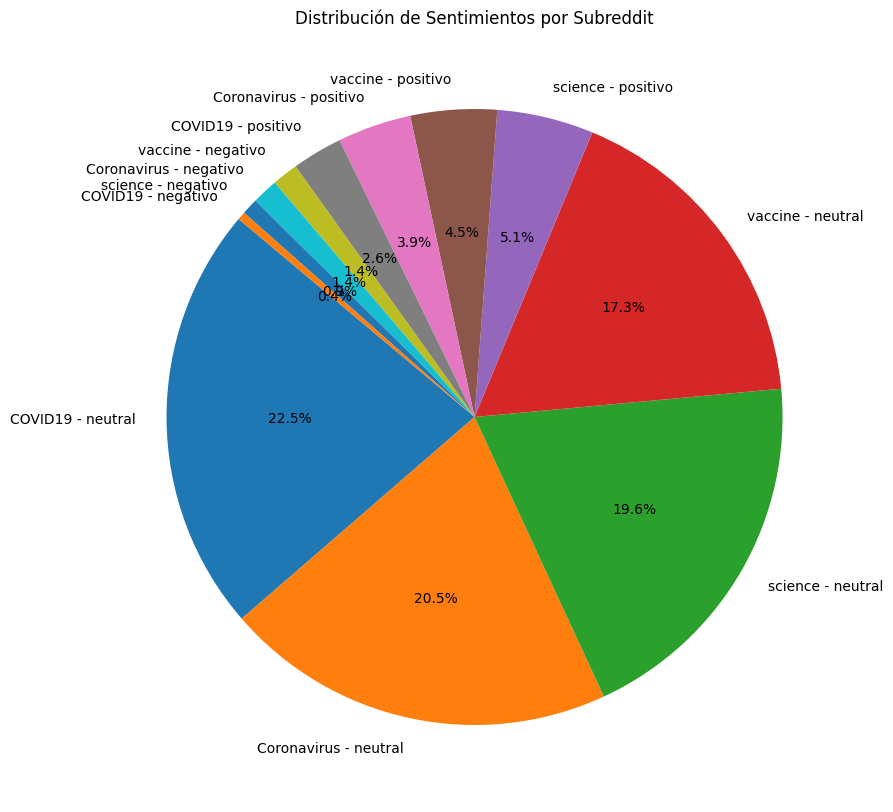

In [30]:
import matplotlib.pyplot as plt

df['subreddit_sentiment'] = df['subreddit'] + ' - ' + df['sentiment_label']

sentiment_counts = df['subreddit_sentiment'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Sentimientos por Subreddit')
plt.show()

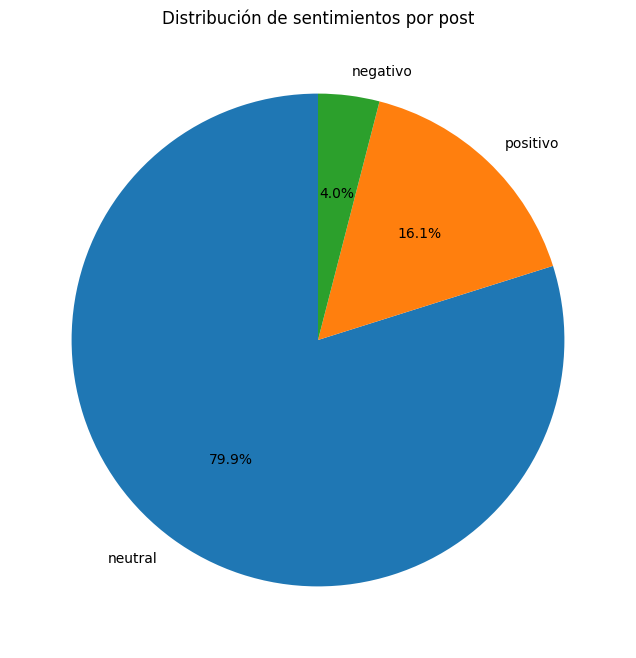

In [31]:
sentiment_distribution = df['sentiment_label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de sentimientos por post')
plt.show()

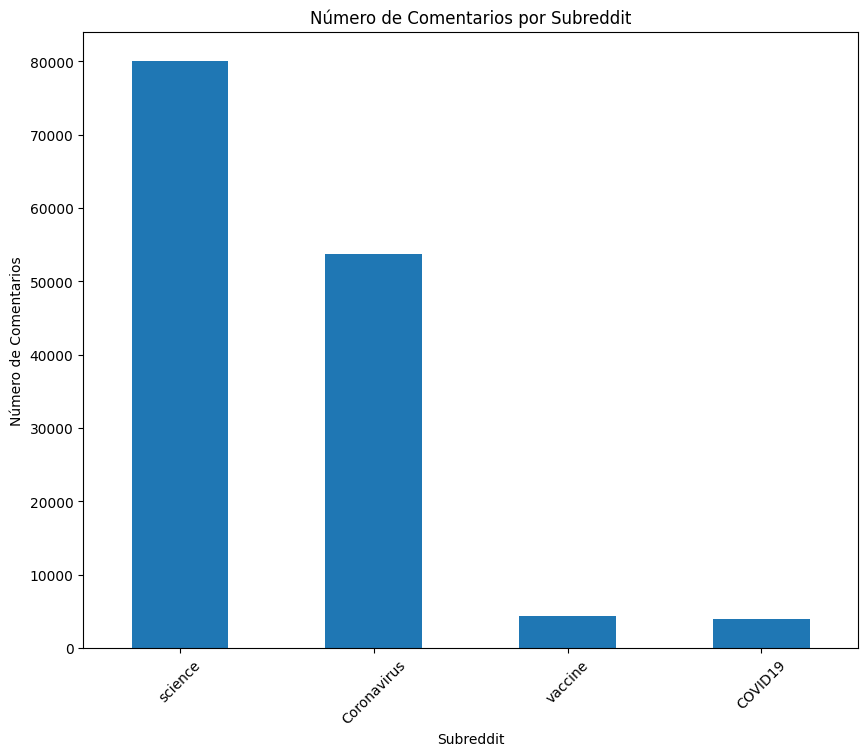

In [39]:
import matplotlib.pyplot as plt

comments_per_subreddit = df.groupby('subreddit')['comments'].sum()

comments_per_subreddit = comments_per_subreddit.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
comments_per_subreddit.plot(kind='bar')
plt.title('Número de Comentarios por Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=45)  
plt.show()
